In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df_path = "../data/raw/hotel.csv"
df = pd.read_csv(df_path)

**About Dataset**
----------------

In [3]:
df.shape

(119390, 36)

In [4]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
85882,City Hotel,0,3,2016,March,13,22,0,1,2,...,Transient,101.0,0,0,Check-Out,2016-03-23,Joshua Brady,Joshua_B@zoho.com,270-755-7208,************1922


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
isnull_mean = df.isna().mean() * 100
isnull_mean

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

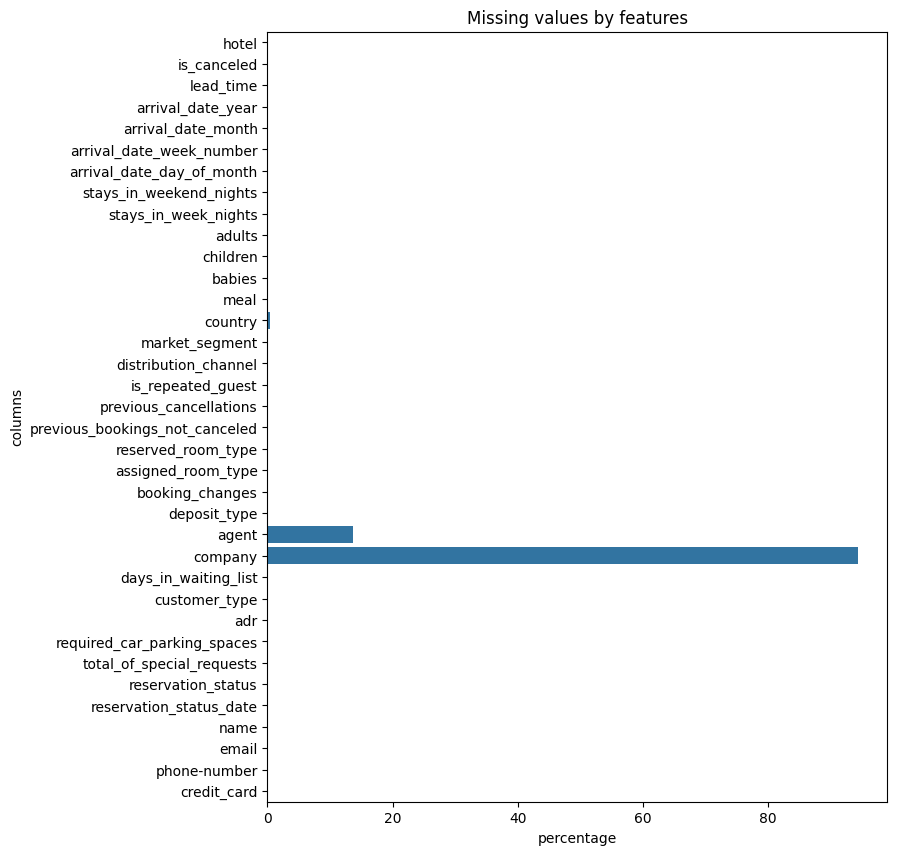

In [7]:
plt.figure(figsize=(8,10))
sns.barplot(isnull_mean, orient="h")
plt.xlabel("percentage")
plt.ylabel("columns")
plt.title("Missing values by features")
plt.show()

Irrelevent features
-------------------

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [9]:
unwanted_columns = ["email", "phone-number", "credit_card", "name"]
df = df.drop(columns=unwanted_columns)

Datatypes
---------

In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
# need to change

# "children" -> int
# "agent" -> int
# "reservation_status_date" -> datetime

How to Impute Missing Values
----------------------------

In [12]:
missing_values_cols = isnull_mean[isnull_mean > 0]
missing_values_cols

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [13]:
missing_values_cols[missing_values_cols > 50]  # column to drop 

company    94.306893
dtype: float64

In [14]:
df[["children", "country", "agent"]].dtypes

children    float64
country      object
agent       float64
dtype: object

In [ ]:
"""impute with

SimpleImputer(mean)
-------------------
-> children
-> agent

SimpleImputer(mode)
-------------------
-> country

"""

# Outlier Checking

In [16]:
numerical_cols = df.select_dtypes(np.number)
categorical_cols = df.select_dtypes("O")

In [17]:
numerical_cols.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


In [18]:
df["booking_changes"].value_counts()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
14         5
13         5
15         3
17         2
16         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64